# Programming Exercises

`````{admonition} Objectives 
:class: tip

- to build and execute a **single-qubit circuit**
- to display and visualize circuit **measurement results**
- to explore **single-qubit gate operations**
- to visualize the **single-qubit state**
- to explore the concept of **quantum superposition**
`````

&nbsp;

## Basics ⚙️

### 1. Importing modules

We need to import *Qiskit* as well as some other modules and functions into our Python code editor. 

```{admonition} Important
You must run this cell each time you reload the page! 
```

In [4]:
import qiskit
import warnings
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Sampler
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram, visualize_transition

warnings.filterwarnings('ignore', category=DeprecationWarning)

qiskit.__version__   # The version of Qiskit we are using

'1.3.2'

&nbsp; 

### 2. Creating a quantum circuit with a single qubit


We use the `QuantumCircuit()` function, and in parentheses we indicate the number of qubits our circuit will have. 

In [5]:
qcworkshop = QuantumCircuit(1)  

&nbsp; 

To see what the circuit looks like, we call the `draw()` function. 

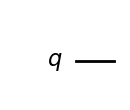

In [6]:
qcworkshop.draw(output='mpl')

&nbsp; 

### 3. Applying a quantum gate

Let's apply an **X gate**. This gate changes the state of our qubit to '1' if it is in state '0' and to '0' if it is in state '1'. 

---
```{admonition} What is the classical equivalent of the X-gate? 
:class: tip, dropdown
The quantum X-gate is analogous to the NOT logic gate. 
```
---

&nbsp; 

We call the `x()` function to apply the gate, but we need to specify the qubit to which the gate is being applied in parentheses. Note that in Python, counting starts from *0* and not from *1*.

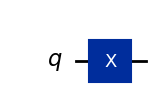

In [7]:
qcworkshop.x(0)
qcworkshop.draw(output='mpl')

&nbsp; 

### 4. Measuring a quantum circuit

To **measure**, a classical bit is added to "collect" the information from the quantum bit. We apply `measure_all()` to measure every qubit in the circuit.

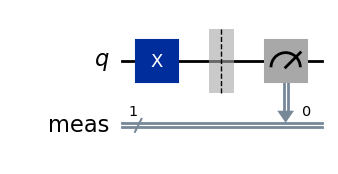

In [8]:
qcworkshop.measure_all()
qcworkshop.draw(output='mpl')

&nbsp; 

### 5. Running a quantum circuit

At this point, we have not yet executed the circuit to obtain results. We need to first **define the backend** on which the circuit is to be runs. <br> 

&nbsp; 
We will use `AerSimulator()` to run our job for 2048 shots of the circuit. 

In [9]:
my_backend = AerSimulator()                        # defining the backend
my_job = my_backend.run(qcworkshop, shots=2000)    # running the circuit on the backend with shots=2048

And to display the results of our job, we use `get_counts()` on the result object.

In [10]:
my_results = my_job.result()       # getting the results from job object
counts = my_results.get_counts()   # getting the counts from result object
counts                             # displaying counts

{'1': 2000}

It is noted that the outcome '1' is obtained for all 2000 shots, which is expected.

&nbsp; 

### 6. Visualizing results 

It is nicer if we display the results on a histogram by calling the `plot_histogram()` function. 

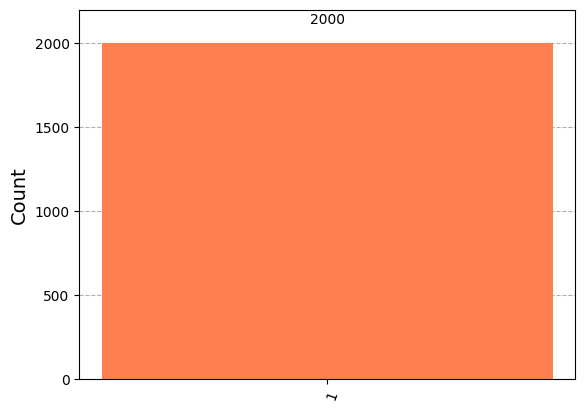

In [11]:
plot_histogram(counts, color="coral")         # you can use other colours. For example, try "green" or "blue". 

&nbsp; 

### 7. Displaying a qubit state

Since we are doing a **simulation** of the quantum circuit rather than actually executing it on a quantum computer backend, we can display the state without performing a measurement. Here are a few ways to do this. 

**Printing the statevector**

We prepare the same single-qubit circuit as before.

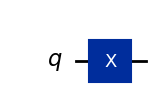

In [12]:
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.draw('mpl')

Next, we read the state of the circuit into a `Statevector()` object and display it with the `draw("latex")` option.

In [13]:
circuit_state = Statevector(circuit)
circuit_state.draw("latex")               

<IPython.core.display.Latex object>


**Displaying on the Bloch sphere**

We can use display the state of a single-qubit on the **Bloch** sphere using the ```Statevector``` object from the previous step. Here's how it's done. 

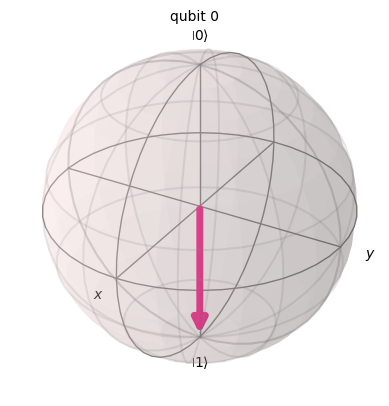

In [14]:
plot_bloch_multivector(circuit_state)

We observe that the arrow is pointing towards the *South* pole of the Bloch sphere, indicating the state $\ket{1}$.


```{note}
Note that we needed to recreate a new circuit in order to display the qubit state. This is because obtaining the statevector with a **measurement** at the end of the circuit would elicit an error message. 
```


&nbsp; 

## Exploring single-qubit gates 📈

### 8. The X-gate 



Let us now visualize the action of the X-gate on the state of the qubit. We use a cool function called `visualize_transition()` for this. This will show a step-by-step transformation of the qubit state from start to finish upon applying the gate.

&nbsp; 



In [15]:
visualize_transition(circuit, trace=True, fpg=30, spg=2)

&nbsp; 

::::{grid}
:::{grid-item-card} 
:class-header: bg-light
🧠 **CODING ACTIVITY 1 &mdash; Apply more than one X-gate**
^^^

1. Create a one-qubit quantum circuit.
2. Apply **two X-gates**.
3. Display the circuit state on the Bloch sphere.
4. Next, visualize the transition of the state.
5. Repeat the above exercise for a circuit with **three X-gates.**

**What do you notice?**
:::
::::


In [13]:
# WRITE YOUR CODE HERE! 
# 
#
#


&nbsp; 

```{dropdown} Answer
The second X-gate undoes the operation of the first and returns the qubit to its initial state $\ket{0}$. 
Three X-gates is equivalent to applying a single X-gate with a final state $\ket{1}$. 


```{code-block}
two_x = QuantumCircuit(1)
two_x.x(0)
two_x.x(0)
two_x_state = Statevector(two_x)
plot_bloch_multivector(two_x_state) 
#visualize_transition(two_x,trace=True, fpg=30, spg=2)  

```

&nbsp; 

### 9. The H-gate

Here's a more interesting gate. Let's create a new quantum circuit where we apply a **Hadamard gate** using `h()`. 

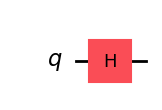

In [16]:
h_circuit = QuantumCircuit(1)
h_circuit.h(0)
h_circuit.draw("mpl")


Let's take a look at the state of the qubit. 

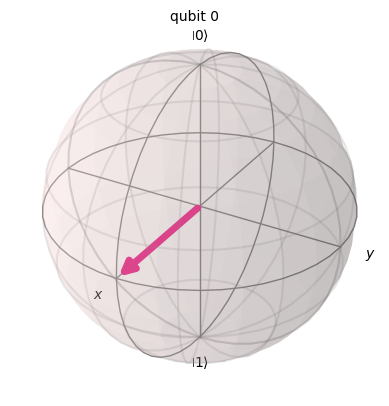

In [17]:
h_state = Statevector(h_circuit)
plot_bloch_multivector(h_state)

We've just placed our qubit into **superposition**! Let's see what happens when we measure our circuit.

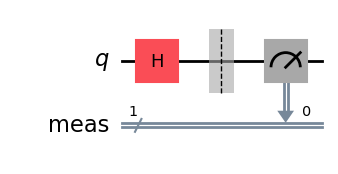

In [18]:
h_circuit.measure_all()          # don't forget to add measurement 
h_circuit.draw("mpl")

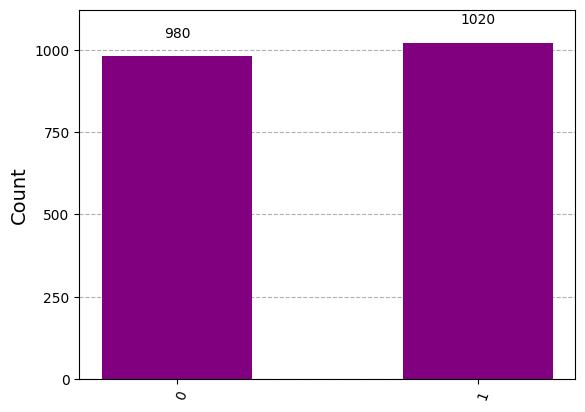

In [19]:
h_job = my_backend.run(h_circuit, shots=2000) 
h_results = h_job.result()
h_counts = h_results.get_counts()
plot_histogram(h_counts, color="purple")


We can see from the counts that the outcome of 2000 shots is split almost equally between '0' and '1'. 
But why aren't exactly the same? 

&nbsp; 

```{dropdown} Answer

It's because of **statistics**! When rolling dice, we know that any of the 6 sides is equally likely. However, if we roll only a few times, we may not see a uniform distribution of outcomes. This changes the more we roll the dice. 

**Try re-running the previous code cell after increasing or decreasing the number of shots**. 
```

&nbsp; 

:::{seealso}

Explore more single-qubit gates in [Extras](orp03). 

:::

&nbsp; 


## Multi-Qubit Circuits 🚀

### 10. Exploring quantum superposition

We saw how the **Hadamard** gate is able to put a single qubit into superposition. Let's see the impact of the Hadamard gate with a larger circuit. 


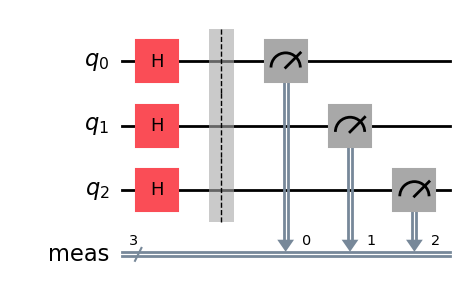

In [20]:
big_circuit = QuantumCircuit(3)
big_circuit.h([0,1,2])            # adding an h-gate to qubits 0,1 and 2.
big_circuit.measure_all()
big_circuit.draw("mpl")                            

Ok, let's run this circuit with a lot of shots. 

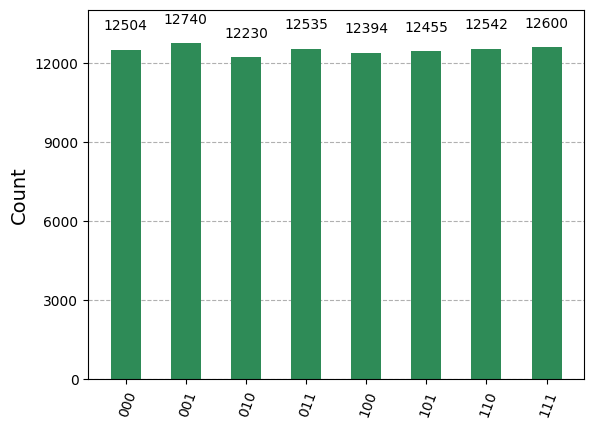

In [21]:
big_job = my_backend.run(big_circuit, shots=100000) 
big_results = big_job.result()
big_counts = big_results.get_counts()
plot_histogram(big_counts, color="seagreen")


From the histogram, all the outcome states were measured with a *fairly* uniform distribution. This means that prior to measurement, the state of the circuit is an **equal superposition** of the states. 

&nbsp; 

### 11. The CX-gate

A key ingredient to quantum computing is performing operations on more than one qubit at a time. This is done with **multi-qubit gates**.

We will demonstrate here the **CX** gate. It is defined using a **control** qubit and a **target** qubit. If the control qubit is in the state $\ket{0}$, then nothing is done to the target qubit. If the control qubit is in the state $\ket{1}$, then an X-gate is applied to the target qubit. 

---
```{admonition} What is the classical equivalent of the CX-gate? 
:class: tip, dropdown
The quantum CX-gate is analogous to the CNOT logic gate. 
```
---

Let's demonstrate the operation of the CX gate on two qubits. First, we draw the circuit. 

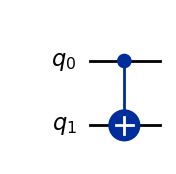

In [22]:
cx_circ = QuantumCircuit(2)
cx_circ.cx(0,1)
cx_circ.draw("mpl")

In [23]:
cx_state = Statevector(cx_circ)
cx_state.draw("latex")

<IPython.core.display.Latex object>

&nbsp;


::::{grid}
:::{grid-item-card} 
:class-header: bg-light
🧠 **CODING ACTIVITY 2 &mdash; Demonstrate the operation of a CX-gate**
^^^

1. Create a two-qubit quantum circuit.
2. Apply an **X-gate** on the first qubit. 
3. Apply a **CX-gate** which is controlled on the first qubit and targets the second qubit.
4. Draw the statevector. 

**What do you notice?**
:::
::::


In [40]:
# WRITE YOUR CODE HERE! 
# 
#
#


&nbsp; 

```{dropdown} Answer
The circuit is now in the state $\ket{11}$. 

```{code-block}
circ = QuantumCircuit(2)
circ.x(0)
circ.cx(0,1)
circ_state = Statevector(circ)
circ_state.draw("latex")

```

---


&nbsp; 

### 12. Quantum entanglement

Until now, we have not entangled any qubits. This is because entanglement requires a multi-qubit gate. We have learned all the gates we need to learn

&nbsp; 


::::{grid}
:::{grid-item-card} 
:class-header: bg-light
🧠 **CODING ACTIVITY 3 &mdash; Demonstrate quantum entanglement**
^^^

1. Create a two-qubit quantum circuit.
2. Apply an **H-gate** on the first qubit. 
3. Apply a **CX-gate** which is controlled on the first qubit and targets the second qubit.
4. Draw the statevector.
5. Measure the circuit.
6. Execute the circuit.
7. Plot a histogram of your results.

**What do you notice?**
:::
::::


In [ ]:
# WRITE YOUR CODE HERE! 
# 
#
#


In [1]:
# MORE CODE SPACE
#
#
#


&nbsp; 

```{dropdown} Answer
The circuit is now in the state $\frac{\ket{00}+\ket{11}}{\sqrt{2}}$. The qubits are entangled always to give either the outcome "00" or "11", where both outcomes are equally probable. The outcomes "01" and "10" are forbidden here.

```python
entangled = QuantumCircuit(2)
entangled.h(0)
entangled.cx(0,1) 

entangled_state = Statevector(entangled)
entangled_state.draw("latex")

---- 

entangled.measure_all()
entangled_job = my_backend.run(entangled, shots=2000)

entangled_results = entangled_job.result()
entangled_counts = entangled_results.get_counts()

plot_histogram(entangled_counts, color="slateblue")

```

---

&nbsp; 


:::{seealso}

Explore quantum entanglement further in [Extras](orp03). 

:::

&nbsp; 

